First we have to install the libraries

In [3]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install xlrd
%pip install scikit-learn
%pip install --upgrade --no-cache-dir scikit-learn
%pip install --upgrade --no-cache-dir imbalanced-learn
%pip uninstall numpy scipy -y
%pip install --upgrade --force-reinstall --no-cache-dir numpy==1.24.3


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/25/92/ee1d7a00bb6b8c55755d4984fd82608603a3cc59959245068ce32e7fb808/scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 13.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec8

In [ ]:
%pip uninstall -y numpy scipy scikit-learn imbalanced-learn

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Successfully uninstalled scikit-learn-1.3.0
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install numpy==1.24.3 scipy==1.10.1 scikit-learn==1.3.0 imbalanced-learn==0.11.0 --no-cache-dir

  Obtaining dependency information for numpy==1.24.3 from https://files.pythonhosted.org/packages/ee/6c/7217a8844dfe22e349bccbecd35571fa72c5d7fe8b33d8c5540e8cc2535c/numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for scipy==1.10.1 from https://files.pythonhosted.org/packages/0d/3e/d05b9de83677195886fb79844fcca19609a538db63b1790fa373155bc3cf/scipy-1.10.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for scikit-learn==1.3.0 from https://files.pythonhosted.org/packages/18/36/60b58b6199547b7b46be03e05508d053162fbce146639bfc65609fa49b23/scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for imbalanced-learn==0.11.0 from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━

In [4]:
import numpy
import scipy
import sklearn
import imblearn

print("NumPy version:", numpy.__version__)
print("SciPy version:", scipy.__version__)
print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)

NumPy version: 1.24.3
SciPy version: 1.10.1
scikit-learn version: 1.3.0
imbalanced-learn version: 0.11.0


Checking the correct versions of the libraries was super important as there are clashes with several versions of some libraries that might affect some functions. These are the ones that worked 

**Task 1: Data Loading and Initial Exploration**

For the first step, I loaded the Titanic dataset and explored its structure to better understand the data.

*Displayed Basic Info*
- I used df.info() to check the number of entries, column names, data types, and missing values.
- This helped identify which features have missing values and whether any data type conversions might be necessary.

*Summary Statistics*
- I used df.describe() to get statistical insights such as mean, standard deviation, and percentiles of numerical features.
- This was useful to understand the range of values, detect potential outliers, and plan how to handle missing values.

*Checking for Missing Values*
- I calculated the number of missing values in each column using df.isnull().sum().
- This allowed me to determine which features have significant missing data.

*Visualizing Missing Data*
- To make missing values easier to identify, I created a heatmap where:
	- Yellow represents missing values.
	- Purple represents available data.

- This visualization helped in deciding which columns to drop or keep in Task 2.

*Examining Survival Distribution*
- Since the goal is to predict who survived, I plotted a count plot for the survived column.
- This showed that only 38.2% of passengers survived, meaning the dataset is imbalanced.

*Exploring Feature Distributions*
- I plotted histograms for numerical variables like age, fare, sibsp, and parch to understand their distributions.


*Analyzing Categorical Variables*
- I visualized distributions of sex, embarked location, and passenger class (pclass) using bar plots.



First 5 rows:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0         

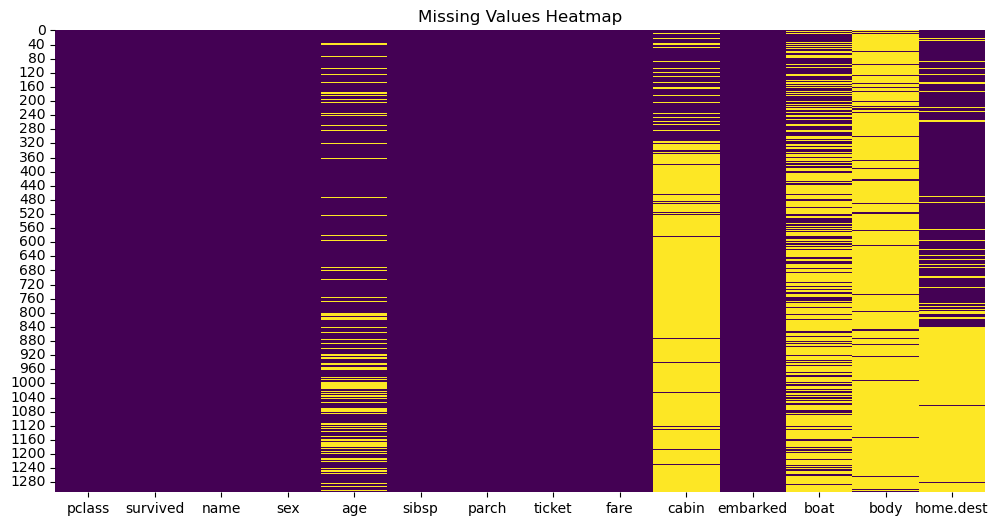

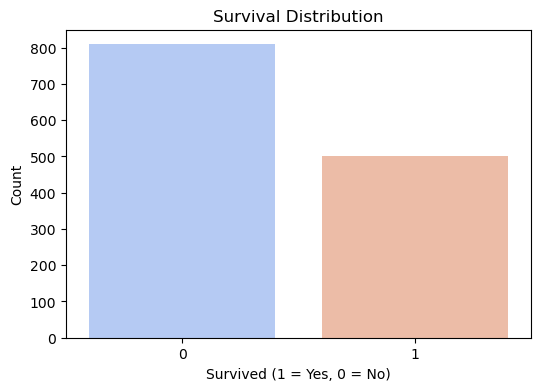


Survival Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64


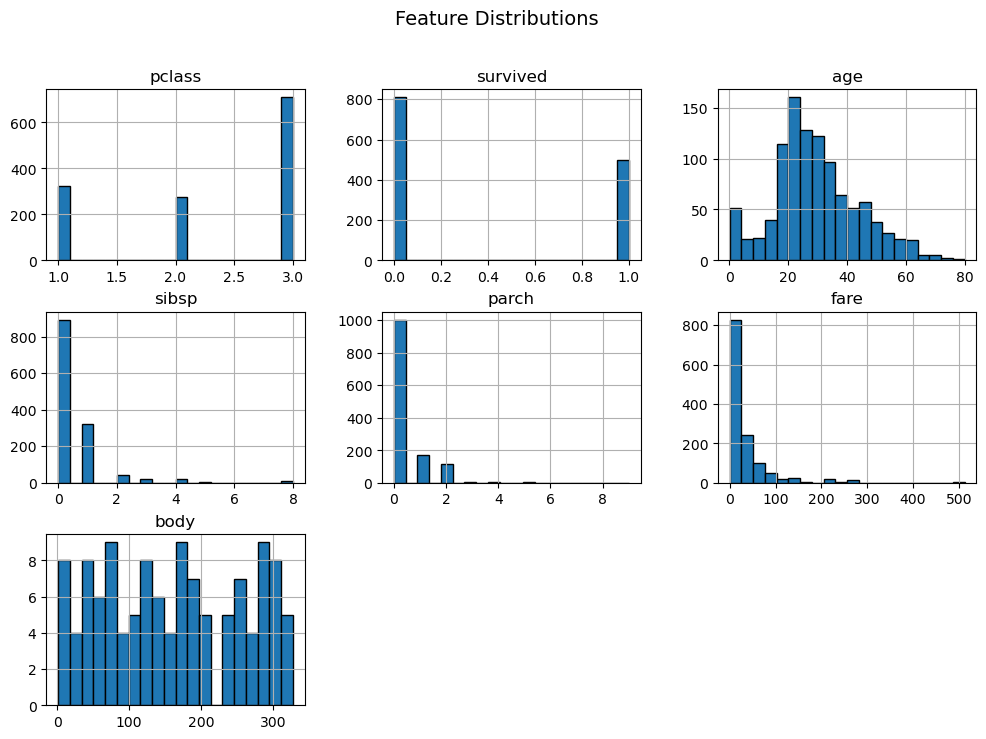

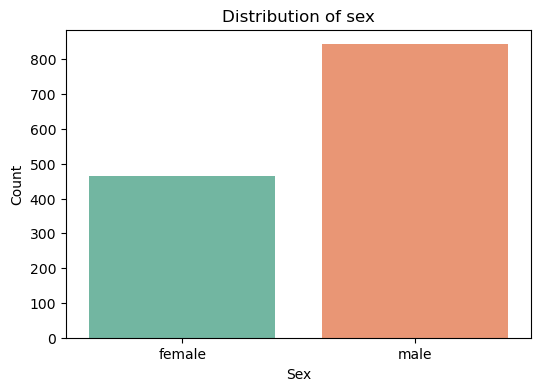

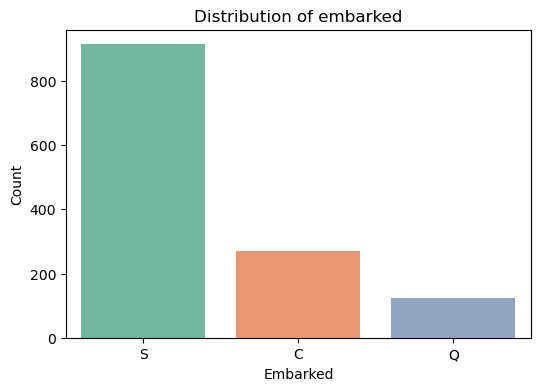

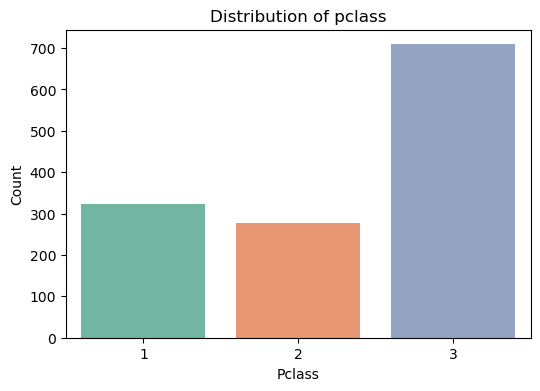

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_excel("titanic3.xls")

# Display first rows
print("\nFirst 5 rows:")
print(df.head())

# Display basic info
print("\nBasic Info:")
print(df.info())


# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

#Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Heatmap to visualize missing values (yellow = missing values)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Checking target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", data=df, palette="coolwarm")
plt.title("Survival Distribution")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Checking class distribution
print("\nSurvival Class Distribution:")
print(df["survived"].value_counts(normalize=True) * 100)

# Exploring numerical features distribution
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Exploring categorical variables
categorical_features = ["sex", "embarked", "pclass"]
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df, palette="Set2")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.show()

Findings from Step 1: Data Exploration

After analyzing the dataset, I identified key insights regarding missing values, feature distributions, and dataset imbalances. These findings will determine what we do in Task 2.

*1. Missing Values Analysis*

Using df.info(), df.isnull().sum(), and the heatmap, I found that several features contain missing values:
- Majority missing: cabin, boat, body, home.dest --> These are unreliable for analysis and will likely be dropped.

- Partially missing: age --> Can be filled using a statistical measure (median).
** Will be using median because we can see that the age has very young as well as very old and this can affect. Using median will avoid skewing data.

- Minimal missing values: fare, embarked --> Easy to fill using the median for fare and mode for embarked.
**for fare we are using median because we want to prevent the outliers of the expensive tickets as it is highly skewed. For embarked we will be using the mode as there are only very very few missing values, filling it with the most common one is the best idea

**What will be done for step 2:** Drop cabin, boat, body, and home.dest, while imputing missing values for age, fare, and embarked.

*2. Survival Rate Imbalance*
- 61.8% of passengers did not survive, while 38.2% survived.
- The dataset is imbalanced. This may affect model performance

*3. Feature Distributions*

Numerical Features:
- age: Right-skewed, with most passengers between 20-40 years old.
- fare: Highly skewed, with some passengers paying extremely high fares.
- sibsp & parch: Most passengers traveled alone or with very few family members.

Categorical Features:
- sex: More males than females.
- pclass: Majority of passengers were in 3rd class.
- embarked: Most boarded at S.




**Task 2: Handling Missing Values**


Missing Values After Handling:
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


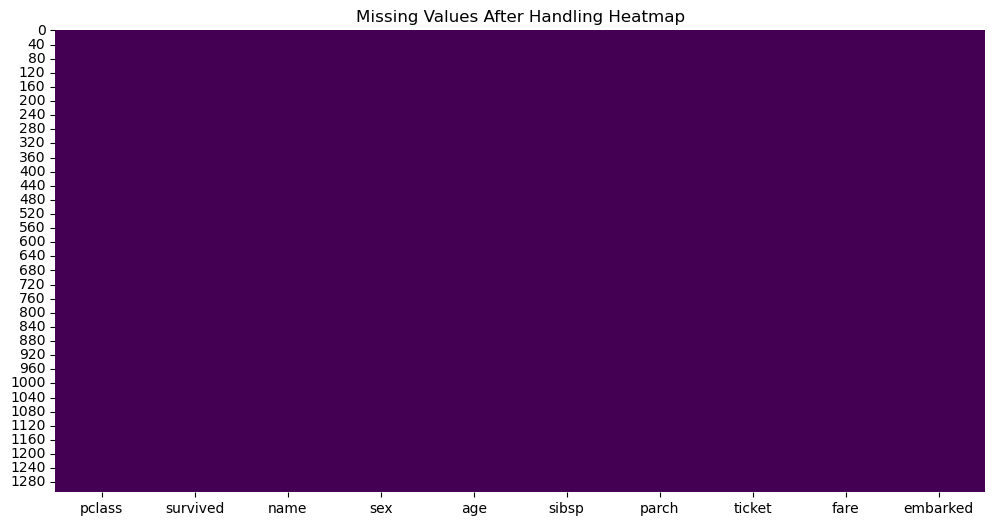

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("titanic3.xls") 


# Handling missing values

# Drop columns 
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True)

# Fill missing values for age and fare with median
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

# Fill missing values for embarked with mode
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Verify missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Visualizing updated missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values After Handling Heatmap")
plt.show()




**Task 3: Encoding Categorical Values**

Let's identify the categorical features:
- sex --> We use Label Encoding because it has only two categories (male, female), making it binary (0 for male, 1 for female). This is the most efficient way to represent it numerically.
- embarked --> We use One-Hot Encoding, which creates separate binary columns for each category (S, C, Q). To avoid redundancy, we drop the first category (C). This means:
    - If both embarked_Q = 0 and embarked_S = 0, the passenger embarked from Cherbourg (C).
    - If embarked_Q = 1, the passenger embarked from Queenstown (Q).
    - If embarked_S = 1, the passenger embarked from Southampton (S).
    - Dont want to use label encoding because it can be misleading by using 0,1,2 making it like a rank and we don't want that.
- pclass --> This is already numerical (1, 2, 3), representing different ticket classes (these ARE different ranks, so no problem). No encoding is needed.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_excel("titanic3.xls")  

# Handling missing values
# Drop columns with too many missing values
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True)

# Fill missing values for age and fare with median
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

# Fill missing values for embarked with mode
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)


# Encoding categorical variables

# Encoding sex using Label Encoding
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Encoding embarked using One-Hot Encoding
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

# We have to convert boolean columns to integers
df[["embarked_Q", "embarked_S"]] = df[["embarked_Q", "embarked_S"]].astype(int)


# Verify encoding is made correctly
print("\nEncoded DataFrame Sample:")
print(df.head())



Encoded DataFrame Sample:
   pclass  survived                                             name  sex  \
0       1         1                    Allen, Miss. Elisabeth Walton    1   
1       1         1                   Allison, Master. Hudson Trevor    0   
2       1         0                     Allison, Miss. Helen Loraine    1   
3       1         0             Allison, Mr. Hudson Joshua Creighton    0   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1   

       age  sibsp  parch  ticket      fare  embarked_Q  embarked_S  
0  29.0000      0      0   24160  211.3375           0           1  
1   0.9167      1      2  113781  151.5500           0           1  
2   2.0000      1      2  113781  151.5500           0           1  
3  30.0000      1      2  113781  151.5500           0           1  
4  25.0000      1      2  113781  151.5500           0           1  


We can confirm that the encoding was done properly

**Task 4: Split the data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel("titanic3.xls") 

# Handling missing values
# Drop columns with too many missing values
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True)

# Fill missing values for age and fare with median
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

# Fill missing values for embarked with mode
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)


# Encoding categorical variables

# Encoding sex using Label Encoding
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Encoding embarked using One-Hot Encoding
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

# We have to convert boolean columns to integers
df[["embarked_Q", "embarked_S"]] = df[["embarked_Q", "embarked_S"]].astype(int)

# Drop non-numeric columns before applying SMOTE/ADASYN
X = df.drop(columns=["survived", "name", "ticket"])  # Ensure only numerical columns remain
y = df["survived"]  # Target variable

# Split into Training (80%) and "Others" (20%)
X_train, X_others, y_train, y_others = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

# Split "Others" into Validation (10%) and Test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_others, y_others, test_size=0.5, random_state=13, stratify=y_others)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (1047, 8), Validation set: (131, 8), Test set: (131, 8)


We split the dataset into Training (80%), Validation (10%), and Test (10%) to ensure a structured approach for model training, hyperparameter tuning, and final evaluation.

First, we separate 80% for training, leaving 20% as “Others”, using train_test_split(), with stratify=y to maintain class distribution and random_state=13 for reproducibility. Then, "Others" is split equally into Validation (10%) and Test (10%), ensuring a fair balance between tuning and evaluation.

 We perform data splitting before feature scaling to prevent data leakage, ensuring that the scaling parameters are learned only from the training data and then applied consistently to validation and test sets.
 
  Using stratification prevents class imbalance, and setting random_state=13 ensures the split remains consistent across runs. 

**Task 5: Feature Scaling**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


# Load the dataset
df = pd.read_excel("titanic3.xls")  

# Handling missing values
# Drop columns with too many missing values
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True)

# Fill missing values for age and fare with median
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

# Fill missing values for embarked with mode
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Encoding categorical variables
# Encoding sex using Label Encoding
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Encoding embarked using One-Hot Encoding
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

# Convert boolean columns to integers
df[["embarked_Q", "embarked_S"]] = df[["embarked_Q", "embarked_S"]].astype(int)

# Drop non-numeric columns before applying SMOTE/ADASYN
X = df.drop(columns=["survived", "name", "ticket"])  # Ensure only numerical columns remain
y = df["survived"]  # Target variable

# Split into Training (80%) and "Others" (20%)
X_train, X_others, y_train, y_others = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

# Split "Others" into Validation (10%) and Test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_others, y_others, test_size=0.5, random_state=13, stratify=y_others)


# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# List of numerical columns to scale
numerical_features = ["age", "fare", "sibsp", "parch"]

# Standardization (zero mean, unit variance)
X_train_standardized = X_train.copy()
X_val_standardized = X_val.copy()
X_test_standardized = X_test.copy()
X_train_standardized[numerical_features] = scaler_standard.fit_transform(X_train[numerical_features])
X_val_standardized[numerical_features] = scaler_standard.transform(X_val[numerical_features])
X_test_standardized[numerical_features] = scaler_standard.transform(X_test[numerical_features])

# Normalization (scales data between 0 and 1)
X_train_normalized = X_train.copy()
X_val_normalized = X_val.copy()
X_test_normalized = X_test.copy()
X_train_normalized[numerical_features] = scaler_minmax.fit_transform(X_train[numerical_features])
X_val_normalized[numerical_features] = scaler_minmax.transform(X_val[numerical_features])
X_test_normalized[numerical_features] = scaler_minmax.transform(X_test[numerical_features])

print("Feature scaling (Standardization and Normalization) applied.")

Feature scaling (Standardization and Normalization) applied.


For this step, I applied both Standardization and Normalization to the numerical features (age, fare, sibsp, parch) to ensure consistent scaling and improve model performance. Since our dataset contains numerical features with different scales (e.g., fare vs. sibsp), applying both methods allows us to compare their effects and choose the best transformation for our logistic regression model.

*Standardization (StandardScaler)*

- Standardization transforms numerical features to have zero mean and unit variance, ensuring that all values are centered around zero. This is particularly beneficial for models that assume normally distributed data, such as:
    - Logistic Regression (which uses gradient-based optimization),
	- Support Vector Machines (SVMs) (which rely on distance-based calculations), and
	- Neural Networks (where unscaled features can cause slow or unstable convergence).

By standardizing our features, we prevent large scale numerical values (like fare) from dominating smaller ones (like sibsp).

*Normalization (MinMaxScaler)*

- Normalization scales all numerical features within a fixed range (0 to 1), making them comparable. This is particularly useful for:
	- Distance-based models like k-NN, where unscaled features can distort similarity calculations.
	- Neural Networks, where values between 0 and 1 help avoid issues like exploding gradients.
	- Data with large differences in scale, such as fare, which can be significantly higher than other features.

Both transformations were applied to maintain flexibility for model experimentation. Since some models benefit more from Standardization while others perform better with Normalization, this approach allows us to test different techniques efficiently.

**Task 6: Addressing Class Imbalances**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# Load the dataset
df = pd.read_excel("titanic3.xls")  

# Handling missing values
# Drop columns with too many missing values
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True)

# Fill missing values for age and fare with median
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

# Fill missing values for embarked with mode
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Encoding categorical variables
# Encoding sex using Label Encoding
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Encoding embarked using One-Hot Encoding
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

# Convert boolean columns to integers
df[["embarked_Q", "embarked_S"]] = df[["embarked_Q", "embarked_S"]].astype(int)

# Drop non-numeric columns before applying SMOTE/ADASYN
X = df.drop(columns=["survived", "name", "ticket"])  # Ensure only numerical columns remain
y = df["survived"]  # Target variable

# Split into Training (80%) and "Others" (20%)
X_train, X_others, y_train, y_others = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

# Split "Others" into Validation (10%) and Test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_others, y_others, test_size=0.5, random_state=13, stratify=y_others)

# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# List of numerical columns to scale
numerical_features = ["age", "fare", "sibsp", "parch"]

# Standardization (zero mean, unit variance)
X_train_standardized = X_train.copy()
X_val_standardized = X_val.copy()
X_test_standardized = X_test.copy()
X_train_standardized[numerical_features] = scaler_standard.fit_transform(X_train[numerical_features])
X_val_standardized[numerical_features] = scaler_standard.transform(X_val[numerical_features])
X_test_standardized[numerical_features] = scaler_standard.transform(X_test[numerical_features])

# Normalization (scales data between 0 and 1)
X_train_normalized = X_train.copy()
X_val_normalized = X_val.copy()
X_test_normalized = X_test.copy()
X_train_normalized[numerical_features] = scaler_minmax.fit_transform(X_train[numerical_features])
X_val_normalized[numerical_features] = scaler_minmax.transform(X_val[numerical_features])
X_test_normalized[numerical_features] = scaler_minmax.transform(X_test[numerical_features])

# Addressing Class Imbalance using SMOTE
smote = SMOTE(random_state=13)
X_train_smote, y_train_smote = smote.fit_resample(X_train_standardized, y_train)

# Addressing Class Imbalance using ADASYN
adasyn = ADASYN(random_state=13)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_standardized, y_train)

# Check class distributions before and after resampling
print("\nClass Distribution Before Resampling:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))
print("After ADASYN:", Counter(y_train_adasyn))

print("Feature scaling (Standardization and Normalization) applied.")



Class Distribution Before Resampling: Counter({0: 647, 1: 400})
After SMOTE: Counter({0: 647, 1: 647})
After ADASYN: Counter({0: 647, 1: 628})
Feature scaling (Standardization and Normalization) applied.


Class imbalance occurs when one class in a dataset significantly outweighs the other, which can bias machine learning models toward the majority class. In our Titanic dataset, the survival rate is imbalanced, meaning the model might be more likely to predict that a passenger did not survive.

*Initial Class Distribution*

- Before applying any resampling techniques, we examined the distribution of the target variable:
	- Not Survived (0): 647 passengers
	- Survived (1): 400 passengers
This imbalance can negatively impact the model’s ability to correctly predict survivors since it would be biased toward the majority class.


- To handle this imbalance, we applied two oversampling techniques:
	- SMOTE: Generates synthetic samples for the minority class by interpolating between existing observations.
	- ADASYN: Similar to SMOTE but focuses more on creating synthetic data for instances that are harder to classify.

*Class Distribution After SMOTE and ADASYN*
- SMOTE Resampling: Adjusts the dataset to a balanced distribution:
	- Not Survived (0): 647
	- Survived (1): 647
SMOTE forces an exact balance between both classes.
- ADASYN Resampling: Slightly different approach that focuses on harder-to-learn examples:
	- Not Survived (0): 647
	- Survived (1): 628
ADASYN does not enforce an exact balance but improves class distribution by focusing on underrepresented and difficult samples.


We applied SMOTE and ADASYN only on the training set to prevent information leakage. Performing oversampling before splitting would cause artificially generated data to be included in both training and validation/test sets, leading to overly optimistic model performance. By applying it only to the training set, we ensure the validation and test sets remain representative of the original dataset distribution.

**Task 7: Feature Selection**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.linear_model import LogisticRegression
import numpy as np


# Load the dataset
df = pd.read_excel("titanic3.xls") 

# Handling missing values
# Drop columns with too many missing values
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True)

# Fill missing values for age and fare with median
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

# Fill missing values for embarked with mode
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Encoding categorical variables
# Encoding sex using Label Encoding
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Encoding embarked using One-Hot Encoding
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

# Convert boolean columns to integers
df[["embarked_Q", "embarked_S"]] = df[["embarked_Q", "embarked_S"]].astype(int)

# Drop non-numeric columns before applying SMOTE/ADASYN
X = df.drop(columns=["survived", "name", "ticket"])  # Ensure only numerical columns remain
y = df["survived"]  # Target variable

# Split into Training (80%) and "Others" (20%)
X_train, X_others, y_train, y_others = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

# Split "Others" into Validation (10%) and Test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_others, y_others, test_size=0.5, random_state=13, stratify=y_others)

# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# List of numerical columns to scale
numerical_features = ["age", "fare", "sibsp", "parch"]

# Standardization (zero mean, unit variance)
X_train_standardized = X_train.copy()
X_val_standardized = X_val.copy()
X_test_standardized = X_test.copy()
X_train_standardized[numerical_features] = scaler_standard.fit_transform(X_train[numerical_features])
X_val_standardized[numerical_features] = scaler_standard.transform(X_val[numerical_features])
X_test_standardized[numerical_features] = scaler_standard.transform(X_test[numerical_features])

# Normalization (scales data between 0 and 1)
X_train_normalized = X_train.copy()
X_val_normalized = X_val.copy()
X_test_normalized = X_test.copy()
X_train_normalized[numerical_features] = scaler_minmax.fit_transform(X_train[numerical_features])
X_val_normalized[numerical_features] = scaler_minmax.transform(X_val[numerical_features])
X_test_normalized[numerical_features] = scaler_minmax.transform(X_test[numerical_features])

# Addressing Class Imbalance using SMOTE
smote = SMOTE(random_state=13)
X_train_smote, y_train_smote = smote.fit_resample(X_train_standardized, y_train)

# Addressing Class Imbalance using ADASYN
adasyn = ADASYN(random_state=13)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_standardized, y_train)

# Feature Selection using L1 Regularization 
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=13)
lasso.fit(X_train_smote, y_train_smote)

# Get non-zero coefficient features
selected_features = X_train.columns[lasso.coef_[0] != 0]
print("Selected Features using L1 Regularization:", selected_features)

# Reduce dataset to selected features
X_train_selected = X_train_smote[selected_features]
X_val_selected = X_val_standardized[selected_features]
X_test_selected = X_test_standardized[selected_features]

print("Feature Selection applied using L1 Regularization.")

Selected Features using L1 Regularization: Index(['pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked_Q', 'embarked_S'], dtype='object')
Feature Selection applied using L1 Regularization.


We applied L1 Regularization (Lasso Regression) to identify the most relevant features for predicting survival on the Titanic.


While we did not explicitly filter out low-variance or highly correlated features in this step, L1 Regularization inherently handles feature selection by shrinking the coefficients of irrelevant features to zero, effectively removing them from the model.
This means that only the most important features remain, reducing the complexity of the model.


- Findings:

	- After applying L1 Regularization, the following features were selected:
		- pclass (Passenger Class)
		- sex (Gender)
		- age (Passenger Age)
		- sibsp (Number of Siblings/Spouses Aboard)
		- fare (Fare Paid for Ticket)
		- embarked_Q (Embarked at Queenstown)
		- embarked_S (Embarked at Southampton)

These features were identified as the most significant in predicting survival.


Feature selection was applied after resampling the training set with SMOTE to ensure that the selected features were not biased by the original imbalance. Applying it earlier could have resulted in misleading feature importance due to the imbalance between the survived and non-survived classes.

**Task 8: Logistic Regression**

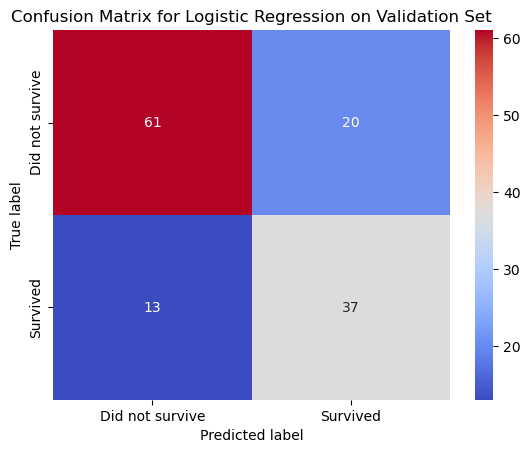

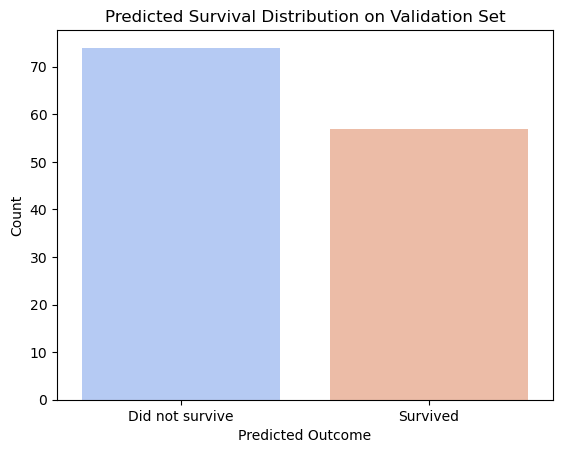

Accuracy Score: 0.7480916030534351
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79        81
           1       0.65      0.74      0.69        50

    accuracy                           0.75       131
   macro avg       0.74      0.75      0.74       131
weighted avg       0.76      0.75      0.75       131



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load the dataset
df = pd.read_excel("titanic3.xls") 

# Handling missing values
# Drop columns with too many missing values
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True)

# Fill missing values for age and fare with median
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

# Fill missing values for embarked with mode
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Encoding categorical variables
# Encoding sex using Label Encoding
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Encoding embarked using One-Hot Encoding
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

# Convert boolean columns to integers
df[["embarked_Q", "embarked_S"]] = df[["embarked_Q", "embarked_S"]].astype(int)

# Drop non-numeric columns before applying SMOTE/ADASYN
X = df.drop(columns=["survived", "name", "ticket"])  # Ensure only numerical columns remain
y = df["survived"]  # Target variable

# Split into Training (80%) and "Others" (20%)
X_train, X_others, y_train, y_others = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

# Split "Others" into Validation (10%) and Test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_others, y_others, test_size=0.5, random_state=13, stratify=y_others)

# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# List of numerical columns to scale
numerical_features = ["age", "fare", "sibsp", "parch"]

# Standardization (zero mean, unit variance)
X_train_standardized = X_train.copy()
X_val_standardized = X_val.copy()
X_test_standardized = X_test.copy()
X_train_standardized[numerical_features] = scaler_standard.fit_transform(X_train[numerical_features])
X_val_standardized[numerical_features] = scaler_standard.transform(X_val[numerical_features])
X_test_standardized[numerical_features] = scaler_standard.transform(X_test[numerical_features])

# Normalization (scales data between 0 and 1)
X_train_normalized = X_train.copy()
X_val_normalized = X_val.copy()
X_test_normalized = X_test.copy()
X_train_normalized[numerical_features] = scaler_minmax.fit_transform(X_train[numerical_features])
X_val_normalized[numerical_features] = scaler_minmax.transform(X_val[numerical_features])
X_test_normalized[numerical_features] = scaler_minmax.transform(X_test[numerical_features])

# Addressing Class Imbalance using SMOTE
smote = SMOTE(random_state=13)
X_train_smote, y_train_smote = smote.fit_resample(X_train_standardized, y_train)

# Addressing Class Imbalance using ADASYN
adasyn = ADASYN(random_state=13)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_standardized, y_train)

# Feature Selection using L1 Regularization 
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=13)
lasso.fit(X_train_smote, y_train_smote)

# Get non-zero coefficient features
selected_features = X_train.columns[lasso.coef_[0] != 0]

# Reduce dataset to selected features
X_train_selected = X_train_smote[selected_features]
X_val_selected = X_val_standardized[selected_features]
X_test_selected = X_test_standardized[selected_features]

# Train Logistic Regression Model
logreg = LogisticRegression(random_state=13)
logreg.fit(X_train_selected, y_train_smote)

# Predict on validation set
y_val_pred = logreg.predict(X_val_selected)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Did not survive", "Survived"], yticklabels=["Did not survive", "Survived"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Logistic Regression on Validation Set")
plt.show()

# Predicted Survival Distribution
sns.countplot(x=y_val_pred, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Did not survive", "Survived"])
plt.xlabel("Predicted Outcome")
plt.ylabel("Count")
plt.title("Predicted Survival Distribution on Validation Set")
plt.show()

# Model Performance 
accuracy = accuracy_score(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", class_report)


Conclusions:

In this project, we trained a Logistic Regression model to predict Titanic passenger survival using a well-preprocessed dataset. 

- Our model achieved an accuracy of ~74.8% on the validation set, with the following key performance insights:
	- The model predicts non-survivors (0) more accurately (precision = 82%) than survivors (precision = 65%).
	- However, recall for survivors (74%) is higher than its precision, meaning that the model captures a good number of actual survivors but also makes more false positive predictions.
	- The imbalance in precision and recall suggests a trade-off where the model may be slightly biased toward predicting non-survivors.
	- Before addressing class imbalance, the dataset was skewed, with more non-survivors than survivors.
	- SMOTE and ADASYN helped balance the dataset, ensuring better representation of both classes.
	- SMOTE (Synthetic Minority Over-sampling Technique) resulted in an exactly balanced dataset (50%-50%), whereas ADASYN (Adaptive Synthetic Sampling) retained a slight imbalance, which might introduce a more natural distribution.
	- Using L1 regularization, the most relevant features were identified: pclass, sex, age, sibsp, fare, embarked_Q, embarked_S.
	- Some potentially redundant or weakly contributing features (e.g., parch) were removed, optimizing model performance.

For future improvements, I plan to experiment with different models beyond Logistic Regression, such as Random Forests or Gradient Boosting, to capture non-linear relationships. Hyperparameter tuning, including adjusting the regularization strength and exploring different solvers, could enhance generalization. Feature engineering may provide additional insights. Additionally, optimizing the decision threshold could help balance precision and recall, particularly for predicting survivors more accurately. All of this was a good experience with handling data but it will continue improving I hope. 

